## Mass Number vs. Separation Energies for atoms of interest

Importing libraries and defining global constants

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_filename = "separation_energy_data_table.txt"

Add functions to read in data from elements of choice

In [4]:
#read in data
def read_data(filename, skiprows = 36):
    """
    reads in data from NDS ascii files.
    note: using fortran syntax, missing uncertainty labels (which will be
    manually added in)
    note: skiprows should skip every line before header labels!
    
    returns data as usable dataframe
    """

    data = pd.read_fwf(data_filename, skiprows = 36)

    #add labels to unlabelled uncertainty columns
    data = data.rename(columns = {
        "Unnamed: 5" : "S(n) uncertainty",
        "Unnamed: 7" : "S(p) uncertainty"
    })
    
    return data

data = read_data(data_filename)

In [5]:
notable_elements = ["Be", "C"]
filtered_data = np.empty((len(notable_elements), 0))

def select_notable_elements(data, element_labels, element_label_index = 2):
    """
    filters entire data table to only show elements of choice
    element_labels is a list of element symbols (as strings!)
    assumes element label is third column of data
    
    returns dict of data frames
    """

    result = {}

    if isinstance(element_label_index, int):
        col = data.columns[element_label_index]
    else:
        col = element_label_index

    for element in element_labels:
        result[element] = data[data[col].astype(str) == element].reset_index(
            drop = True)
            
    return result

filtered_data = select_notable_elements(data, notable_elements)

Add functions to plot data

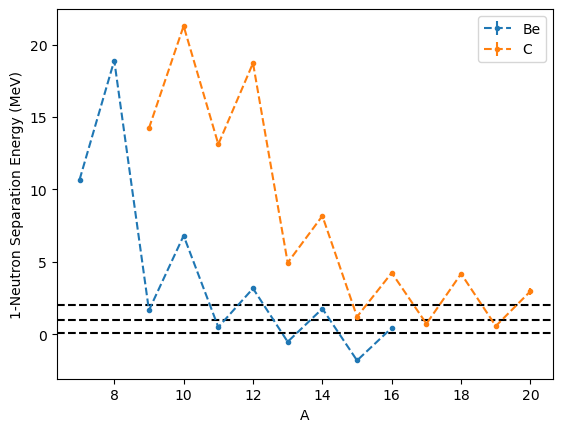

In [7]:
def plot_graph_axes():
    "plots graph axes"
    fig, ax = plt.subplots()
    
    ax.set_xlabel("A")
    ax.set_ylabel("1-Neutron Separation Energy (MeV)")
    
    #show halo nuclei region
    ax.axhline(2, ls = "--", color = "k")
    ax.axhline(1, ls = "--", color = "k")
    ax.axhline(0.1, ls = "--", color = "k")
    
    return ax

def add_graph_data(graph, filtered_data, elements_list):
    """
    add the plots for the selected elements
    converts units for separation energy from keV to MeV!!
    """
    for element in elements_list:
        data = filtered_data[element]
        
        graph.errorbar(
            pd.to_numeric(data.iloc[:, 1], errors = "coerce"),
            pd.to_numeric(data.iloc[:, 4], errors = "coerce") / 1000,
            pd.to_numeric(data.iloc[:, 5], errors = "coerce") / 1000,
            marker = ".", ls = "--", label = element)
        
    plt.legend()
    
    return

graph = plot_graph_axes()
add_graph_data(graph, filtered_data, notable_elements)
plt.show()